In [1]:
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [9]:
# replacing values
dataset['Genre'].replace(['Male', 'Female'],
						[0, 1], inplace=True)
print(dataset)

     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      0   19                  15                      39
1             2      0   21                  15                      81
2             3      1   20                  16                       6
3             4      1   23                  16                      77
4             5      1   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      1   35                 120                      79
196         197      1   45                 126                      28
197         198      0   32                 126                      74
198         199      0   32                 137                      18
199         200      0   30                 137                      83

[200 rows x 5 columns]


In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
print(X_train)

[[135   0  20  73]
 [ 67   1  43  48]
 [ 27   1  45  28]
 [114   0  19  64]
 [169   1  36  87]
 [ 64   1  54  47]
 [  9   0  64  19]
 [ 76   0  26  54]
 [119   1  51  67]
 [144   1  32  76]
 [ 72   1  47  49]
 [125   1  23  70]
 [185   1  41  99]
 [ 98   1  27  60]
 [150   0  34  78]
 [ 25   1  54  28]
 [ 31   0  60  30]
 [161   1  56  79]
 [ 41   1  65  38]
 [ 57   1  51  44]
 [132   0  39  71]
 [ 97   1  47  60]
 [182   1  32  97]
 [ 20   1  35  23]
 [154   1  38  78]
 [ 93   0  48  60]
 [ 55   1  50  43]
 [164   1  31  81]
 [ 52   0  33  42]
 [ 87   1  55  57]
 [140   1  35  74]
 [ 91   1  68  59]
 [138   0  32  73]
 [102   1  49  62]
 [145   0  25  77]
 [ 90   1  50  58]
 [110   0  66  63]
 [ 15   0  37  20]
 [ 28   0  35  28]
 [142   0  32  75]
 [188   0  28 101]
 [ 47   1  50  40]
 [139   0  19  74]
 [196   1  35 120]
 [109   0  68  63]
 [ 63   1  67  47]
 [  3   1  20  16]
 [ 60   0  53  46]
 [137   1  44  73]
 [198   0  32 126]
 [ 44   1  31  39]
 [ 11   0  67  19]
 [195   1  4

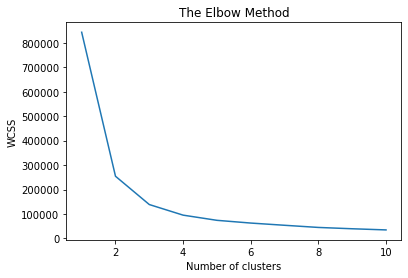

In [14]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

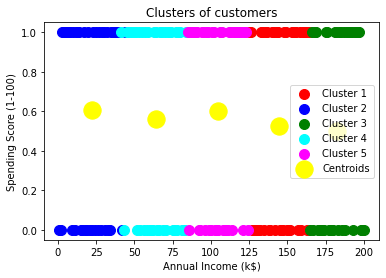

In [16]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()